In [2]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from Lilygo.Recording import Recording, data_integrity
from Lilygo.Dataset import Dataset
import os
import matplotlib.pyplot as plt

In [3]:
# This function aims to find the component caused by gravity from data, which means the signal around 0 Hz
def get_gravity(data):
    filtered_data = np.zeros_like(data)
    # Parameters in IIR filter
    alpla = [1, -1.979133761292768, 0.979521463540373]
    beta = [0.000086384997973502, 0.00012769995947004, 0.000086384997973502]
    # Formula of IIR filter
    for i in range(2, len(data)):
        filtered_data[i] = alpla[0] * (data[i] * beta[0] + data[i-1] * beta[1] + data[i-2] * beta[2] - filtered_data[i-1] * alpla[1] - filtered_data[i-2] * alpla[2])
    return filtered_data

def get_highpass(data):
    filtered_data = np.zeros_like(data)  # filtered_data
    alpla = [1, -1.905384612118461, 0.910092542787947]
    beta = [0.953986986993339, -1.907503180919730, 0.953986986993339]

    for i in range(2, len(data)):
        filtered_data[i] = alpla[0] * (data[i] * beta[0] + data[i-1] * beta[1] + data[i-2] * beta[2] - filtered_data[i-1] * alpla[1] - filtered_data[i-2] * alpla[2])
    return filtered_data

# This funciton aims to realize a high-pass filter with cutoff frequency = 5 Hz. Because according to massive amounts of data, the general 
# maximum frequency of human walking is about 5 Hz
def get_lowpass(data):
    filtered_data = np.zeros_like(data)  # filtered_data
    alpla = [1, -1.80898117793047, 0.827224480562408]
    beta = [0.096665967120306, -0.172688631608676, 0.095465967120306]

    for i in range(2, len(data)):
        filtered_data[i] = alpla[0] * (data[i] * beta[0] + data[i-1] * beta[1] + data[i-2] * beta[2] - filtered_data[i-1] * alpla[1] - filtered_data[i-2] * alpla[2])
    return filtered_data

----train_trace_001{'board_loc': 2, 'path_idx': 4, 'activities': [1], 'gender': 'm', 'body_height': 180, 'legi': '19-943-596'}


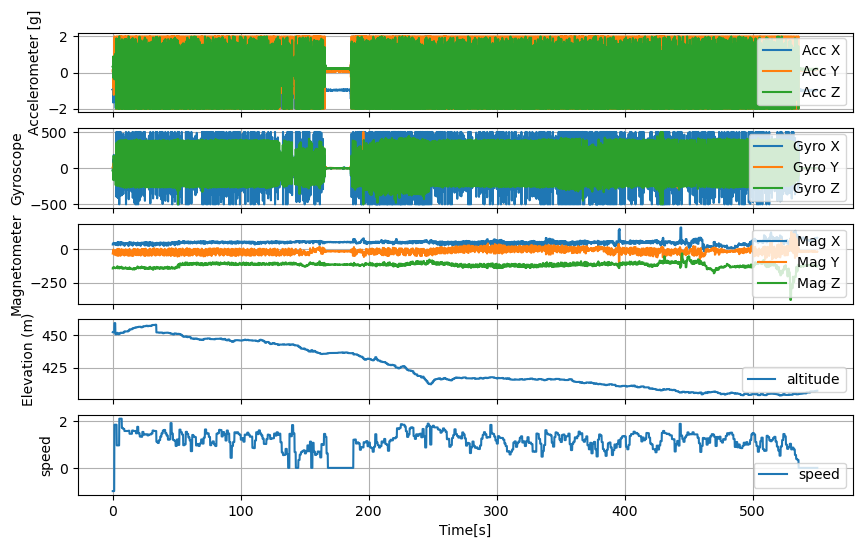

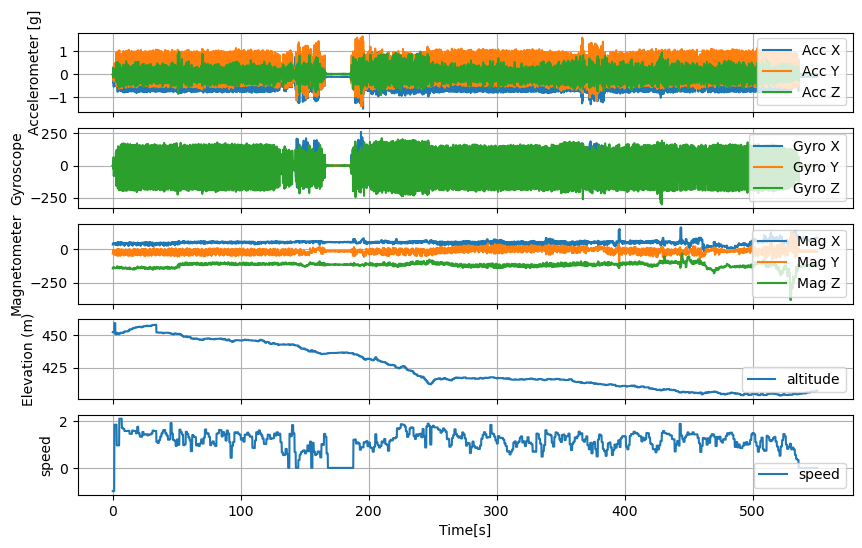

----train_trace_002{'board_loc': 2, 'path_idx': 2, 'activities': [1], 'gender': 'm', 'body_height': 180, 'legi': '19-943-596'}


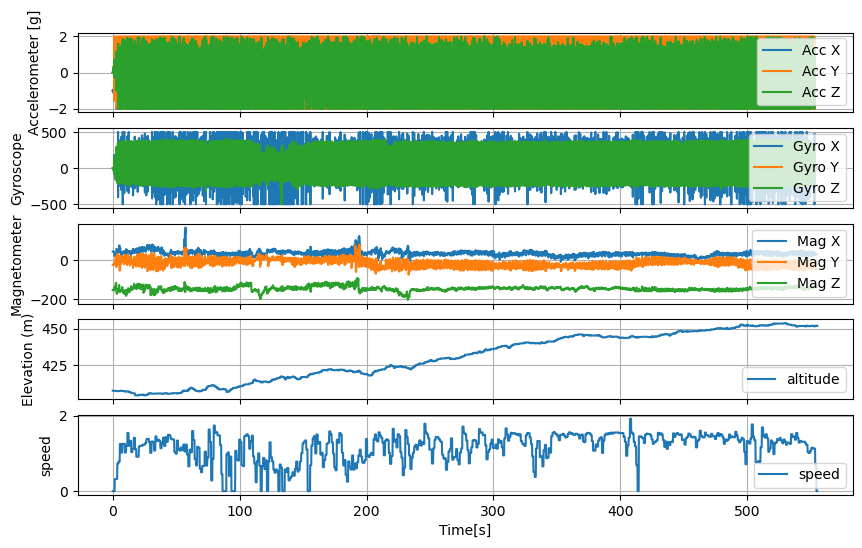

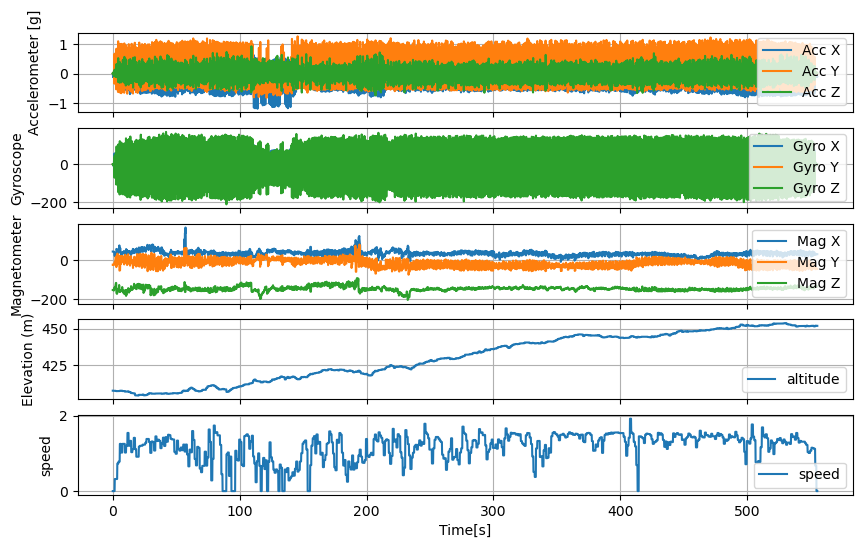

----train_trace_003{'board_loc': 2, 'path_idx': 1, 'activities': [2], 'gender': 'm', 'body_height': 181, 'legi': '20-935-441'}


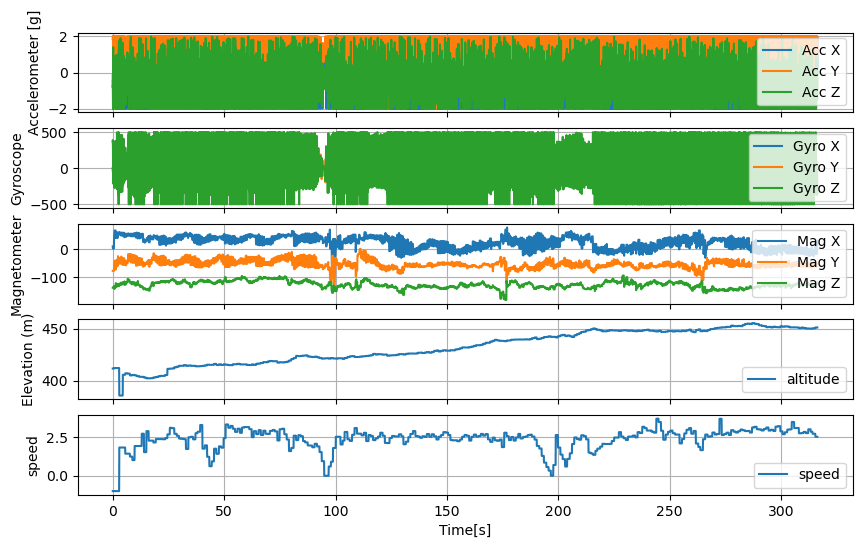

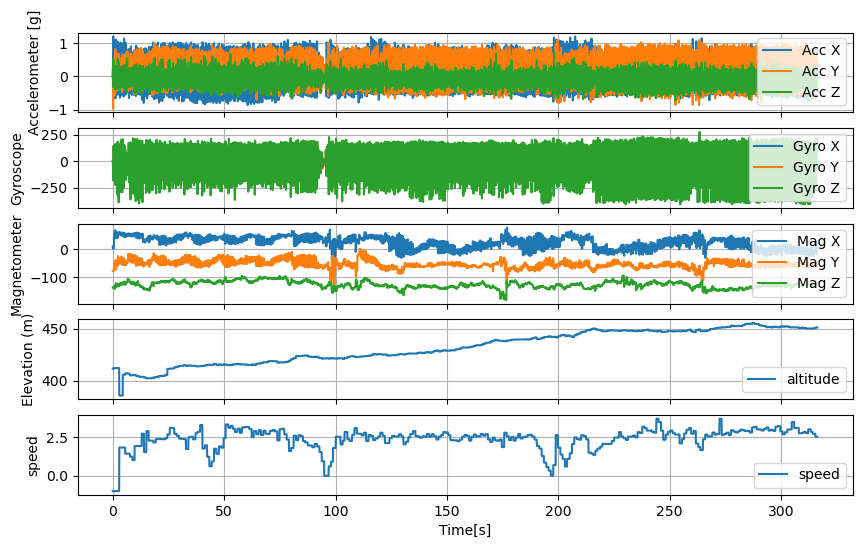

----train_trace_004{'board_loc': 2, 'path_idx': 0, 'activities': [1], 'gender': 'm', 'body_height': 181, 'legi': '20-935-441'}


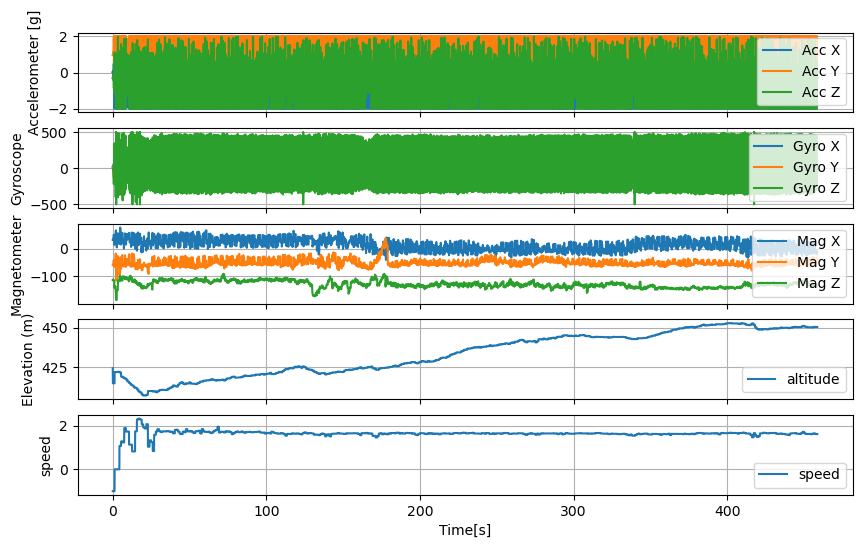

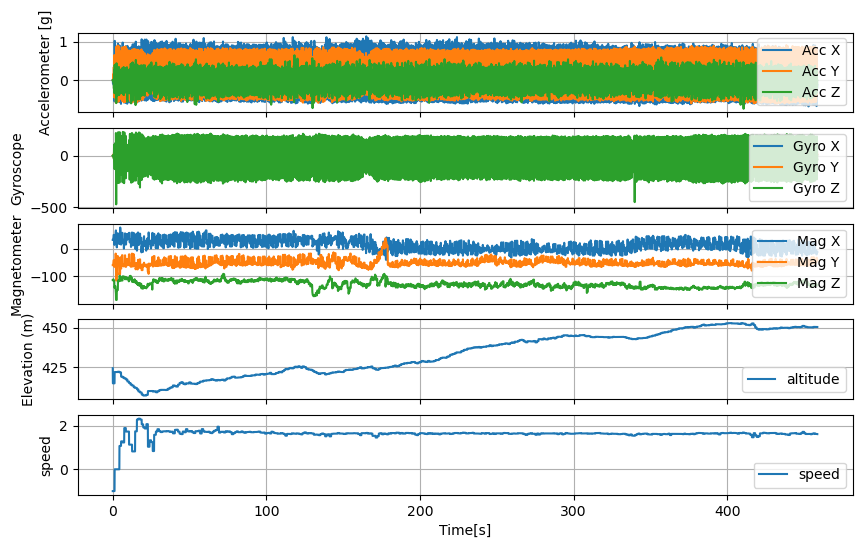

----train_trace_005{'board_loc': 1, 'path_idx': 2, 'activities': [1], 'gender': 'f', 'body_height': 181, 'legi': '22-911-879'}


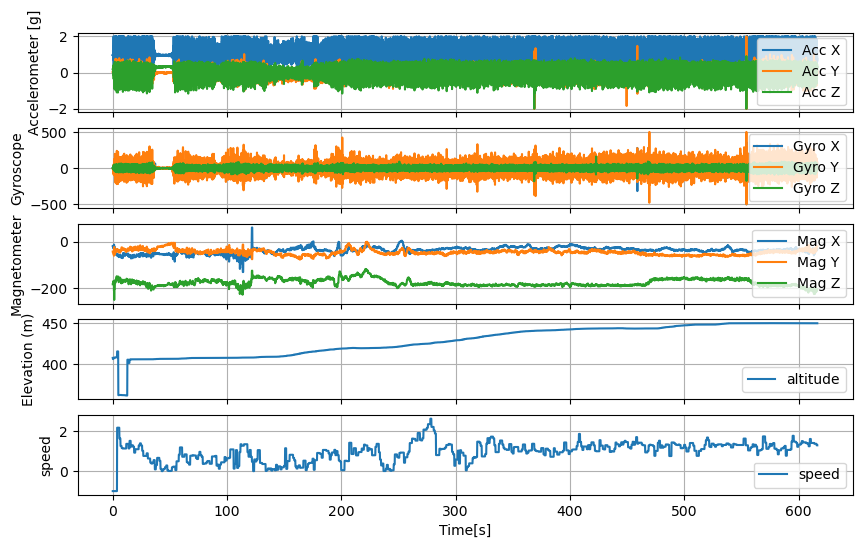

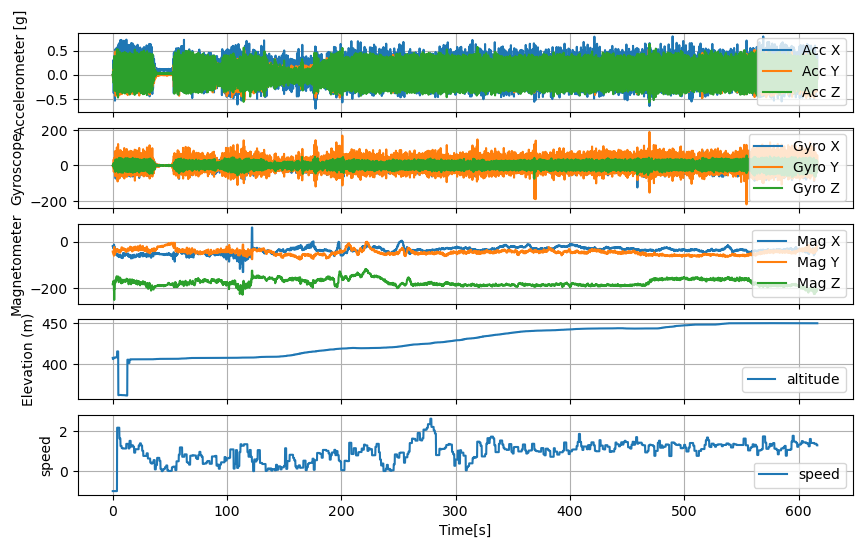

----train_trace_006{'board_loc': 0, 'path_idx': 4, 'activities': [1], 'gender': 'f', 'body_height': 181, 'legi': '22-911-879'}


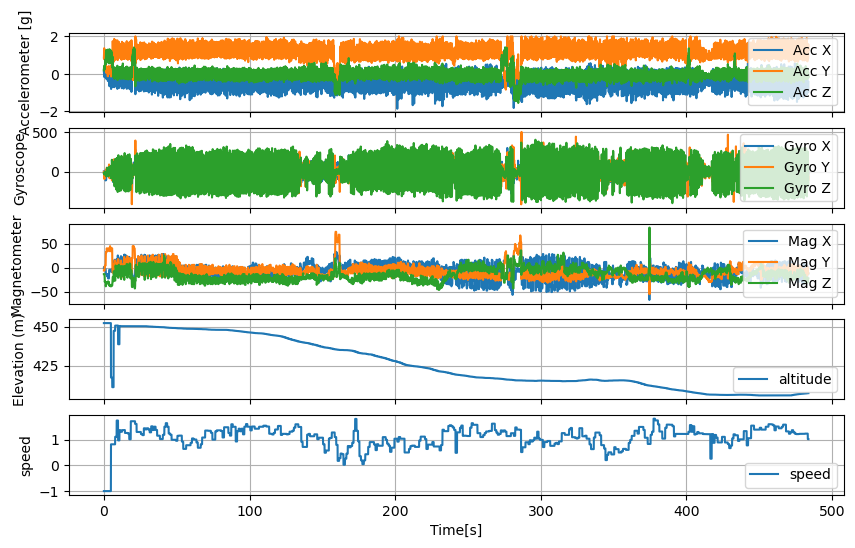

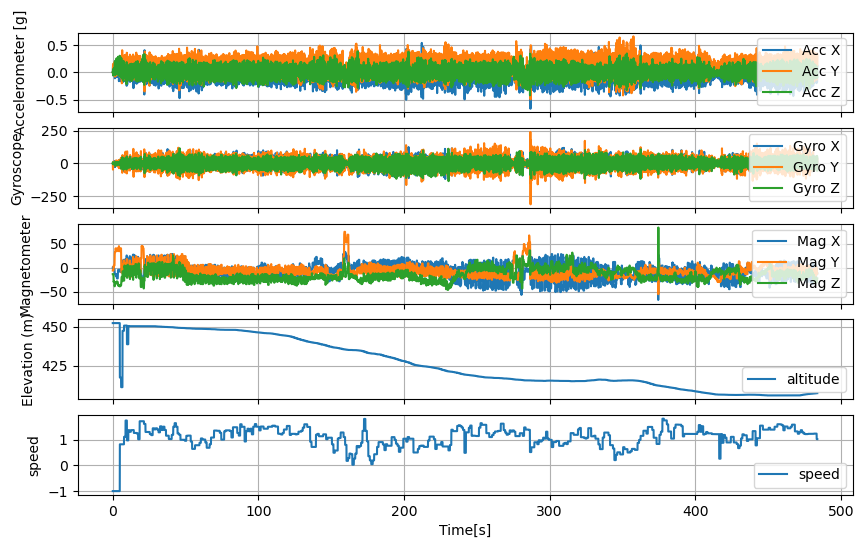

----train_trace_007{'board_loc': 0, 'path_idx': 3, 'activities': [1], 'gender': 'f', 'body_height': 181, 'legi': '22-911-879'}


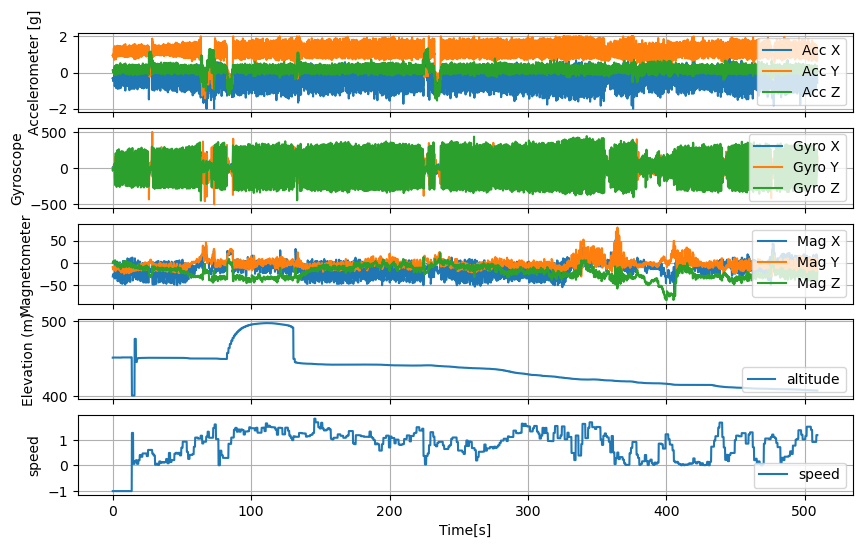

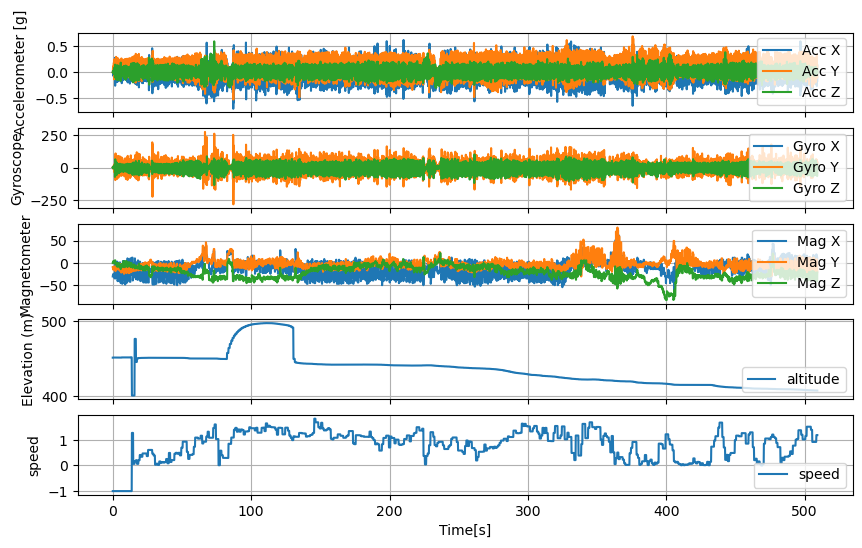

----train_trace_008{'board_loc': 0, 'path_idx': 1, 'activities': [1], 'gender': 'f', 'body_height': 181, 'legi': '22-911-879'}


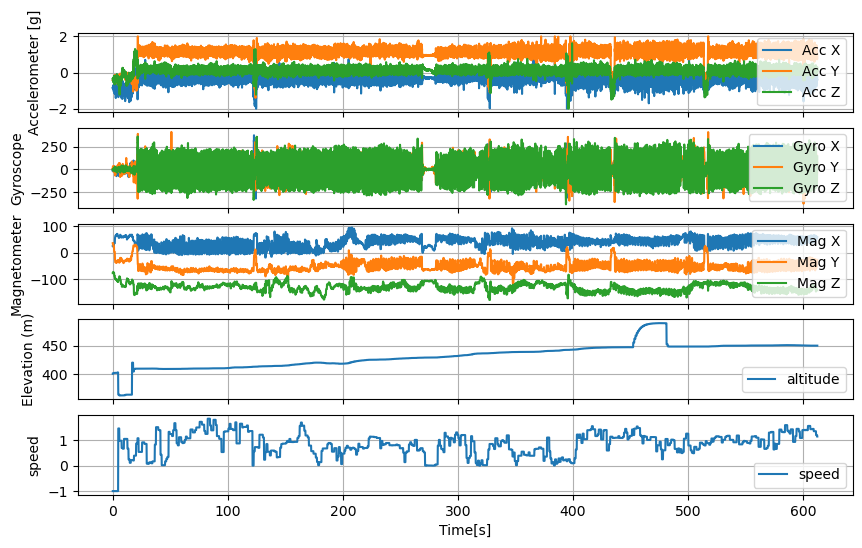

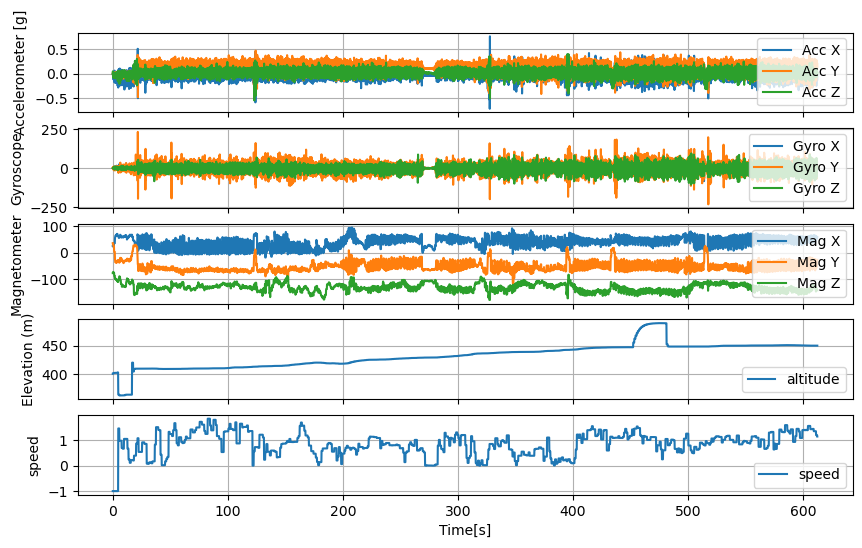

----train_trace_009{'board_loc': 0, 'path_idx': 3, 'activities': [1, 2], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


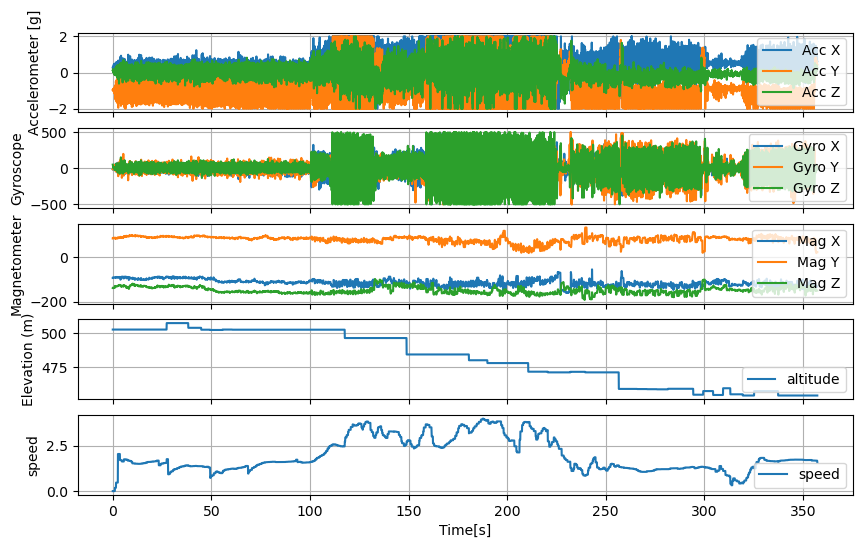

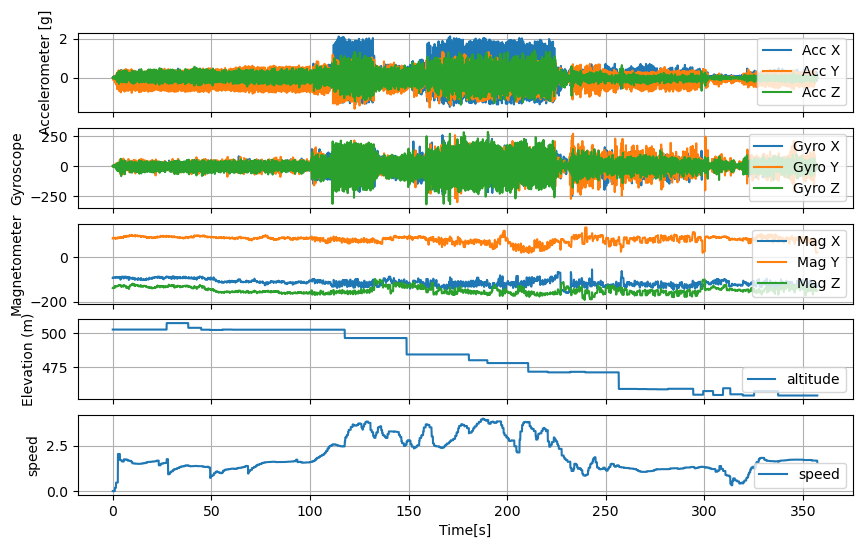

----train_trace_010{'board_loc': 2, 'path_idx': 2, 'activities': [1, 3], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


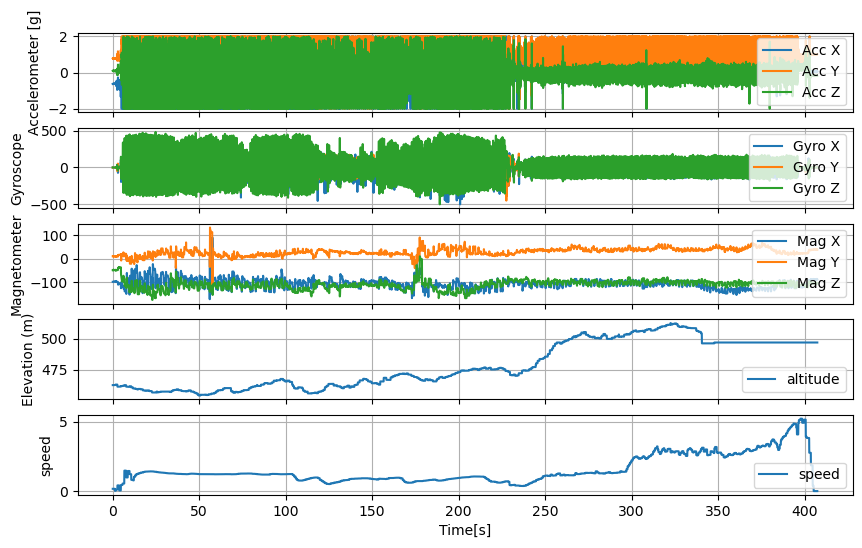

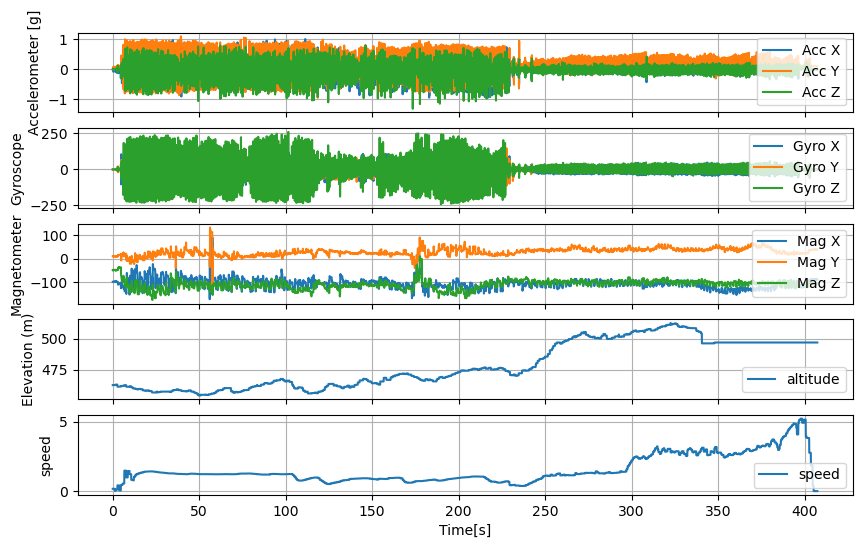

----train_trace_011{'board_loc': 1, 'path_idx': 1, 'activities': [1], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


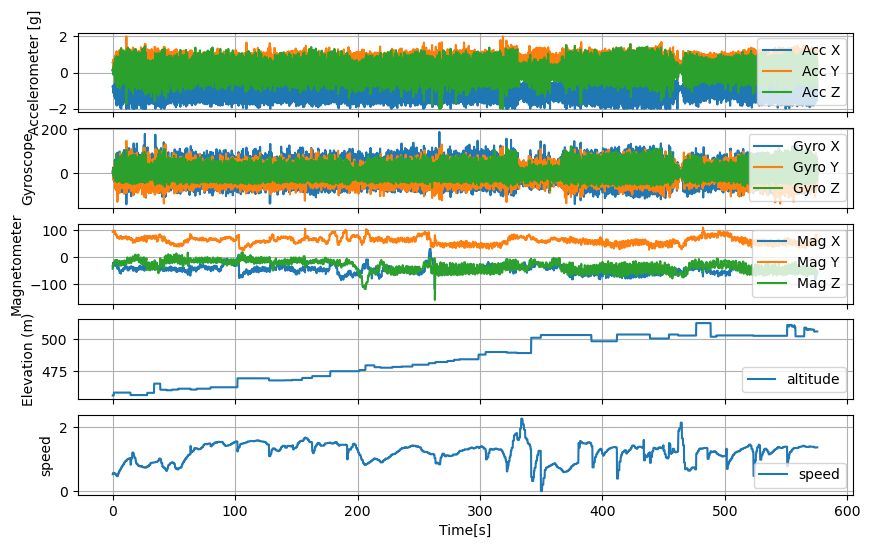

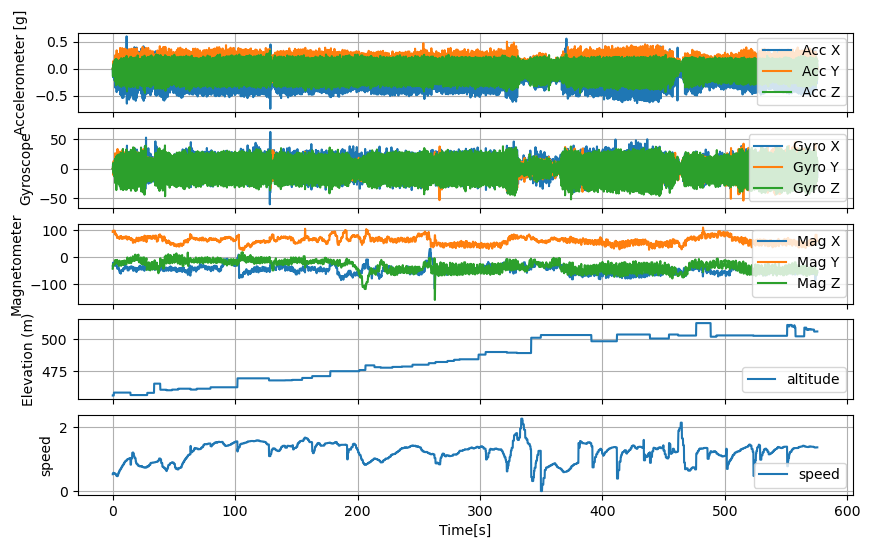

----train_trace_012{'board_loc': 2, 'path_idx': 0, 'activities': [0, 1, 3], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


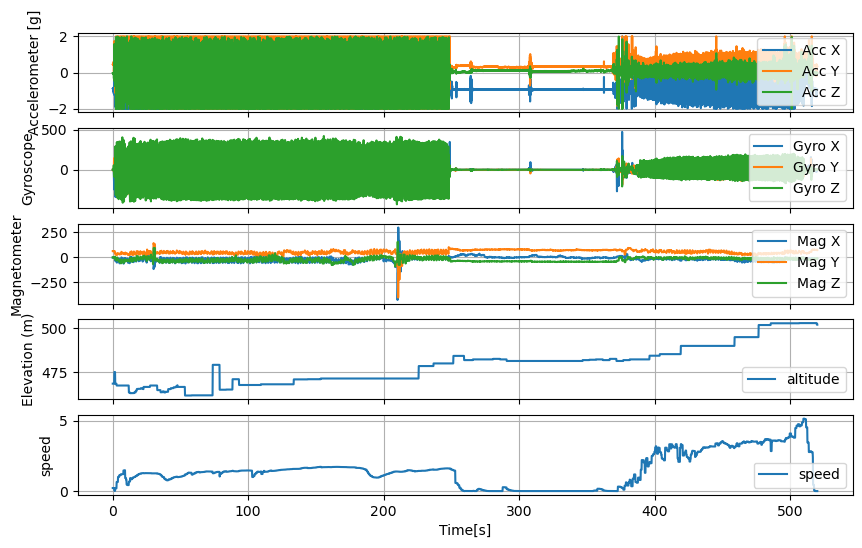

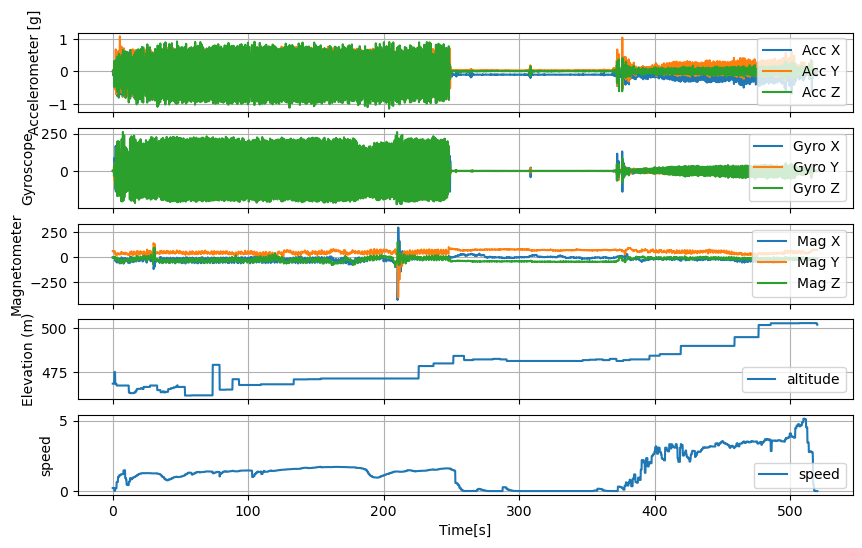

----train_trace_013{'board_loc': 1, 'path_idx': 3, 'activities': [0, 1, 3], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


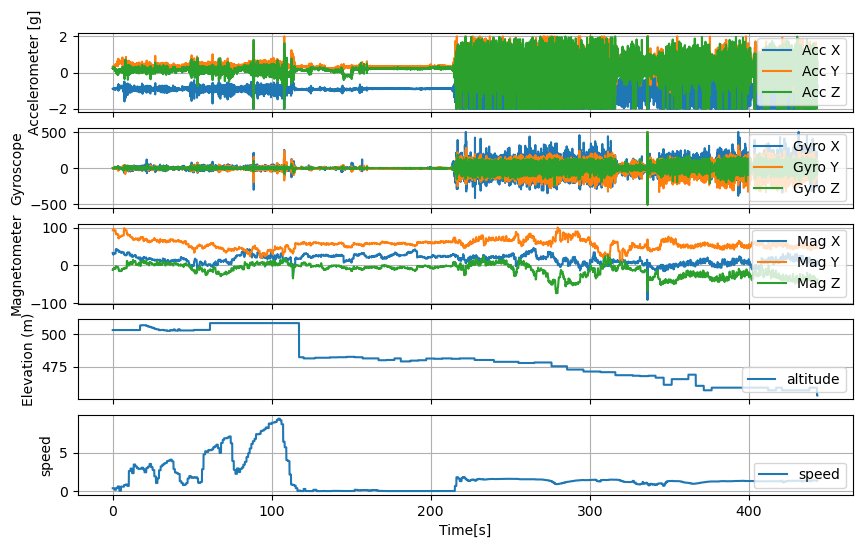

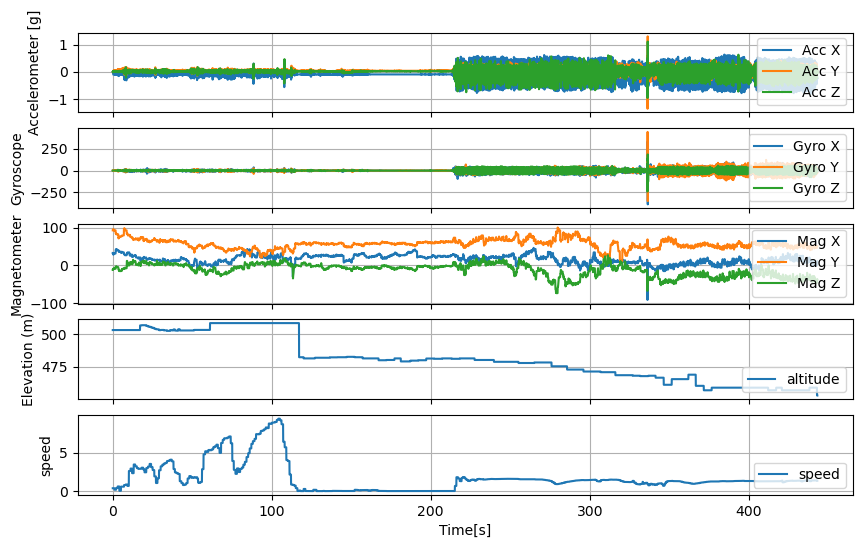

----train_trace_014{'board_loc': 2, 'path_idx': 1, 'activities': [1], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


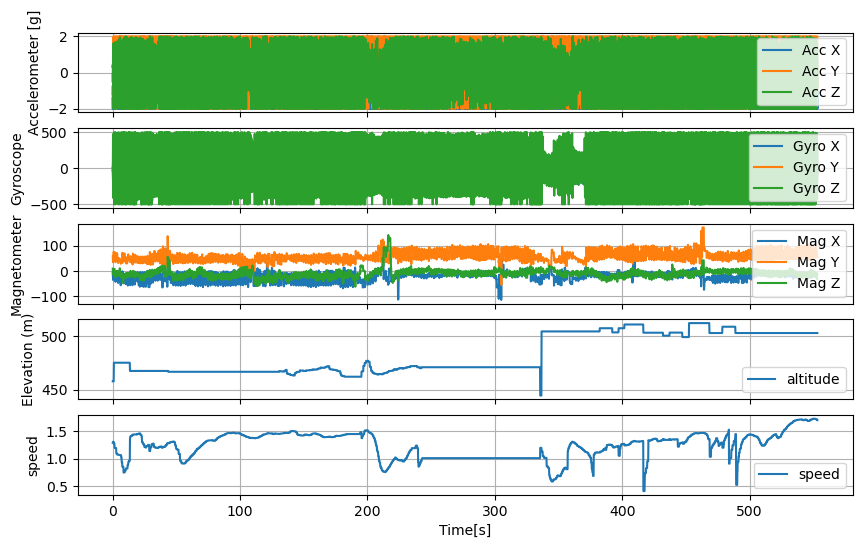

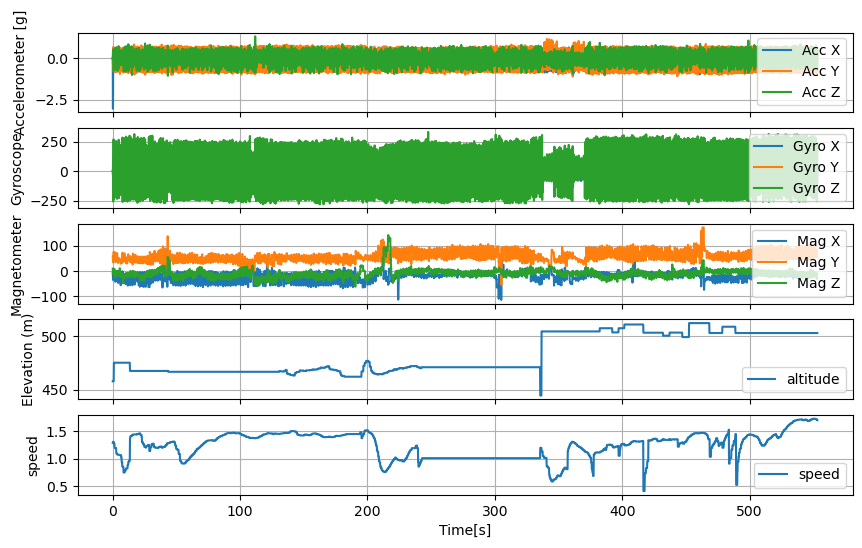

----train_trace_015{'board_loc': 2, 'path_idx': 4, 'activities': [0, 1], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


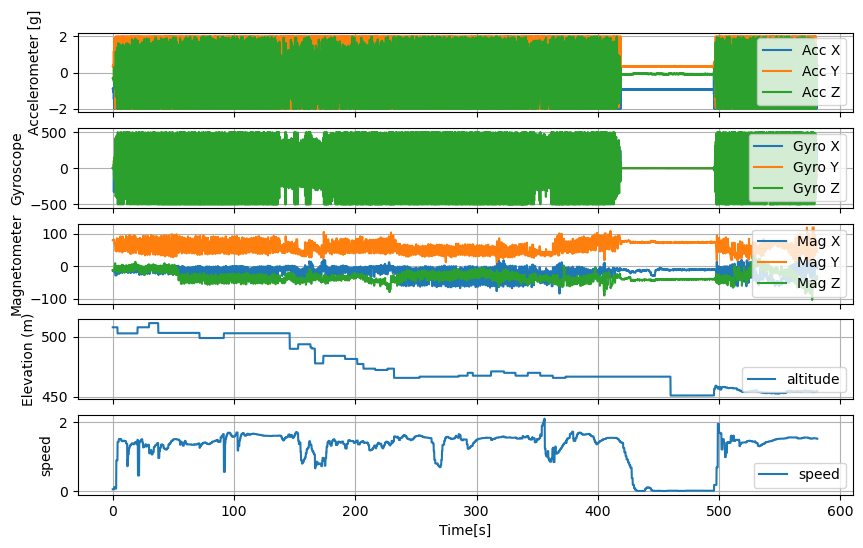

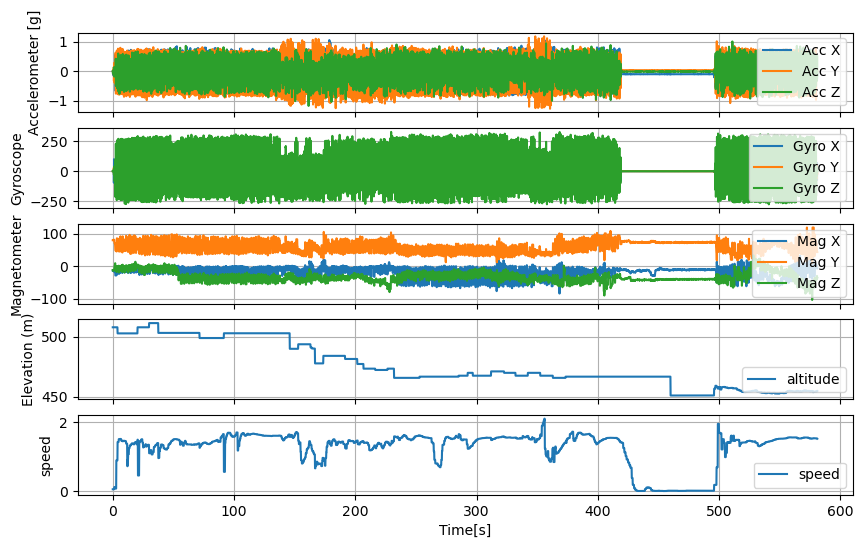

----train_trace_016{'board_loc': 0, 'path_idx': 3, 'activities': [0, 1], 'gender': 'f', 'body_height': 160, 'legi': '16-924-300'}


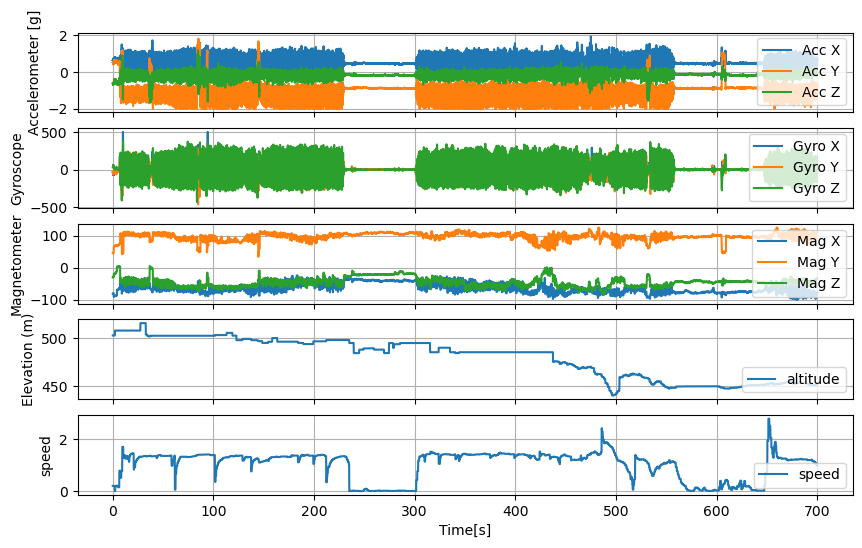

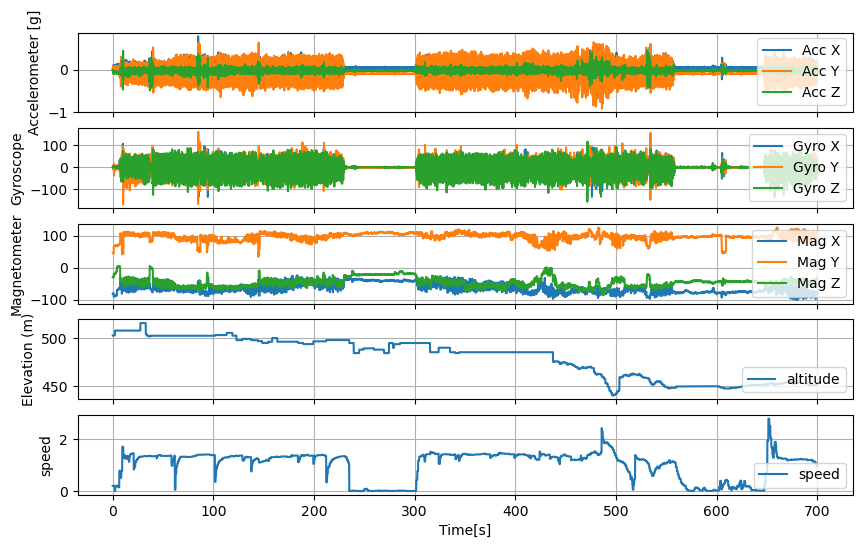

----train_trace_017{'board_loc': 1, 'path_idx': 4, 'activities': [1], 'gender': 'f', 'body_height': 172, 'legi': '19-924-471'}


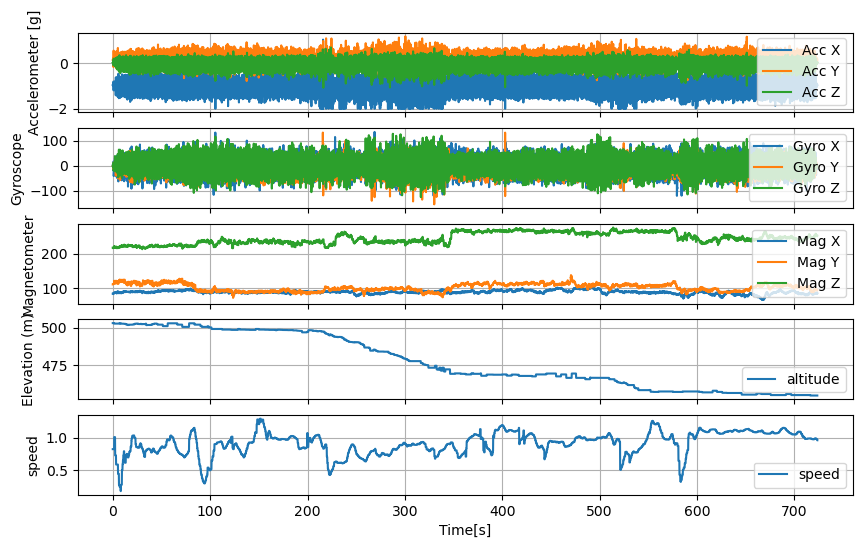

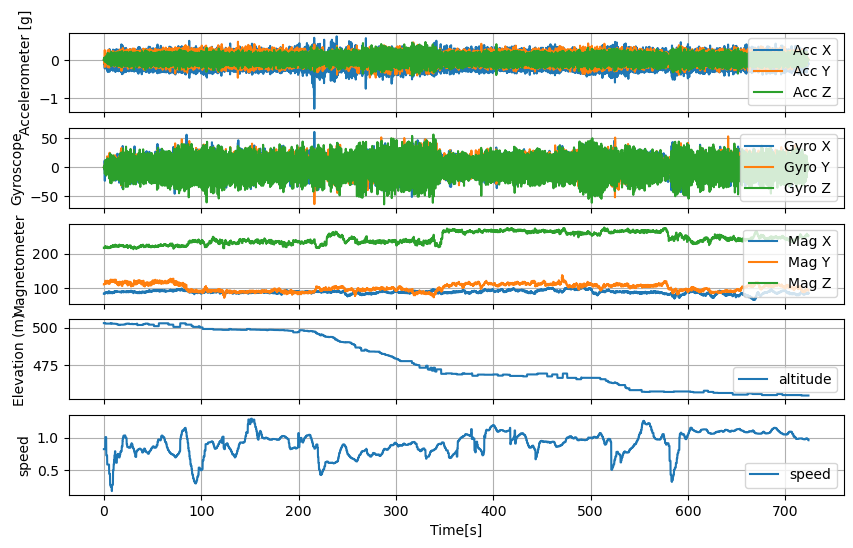

----train_trace_018{'board_loc': 0, 'path_idx': 4, 'activities': [1], 'gender': 'f', 'body_height': 163, 'legi': '22-956-494'}


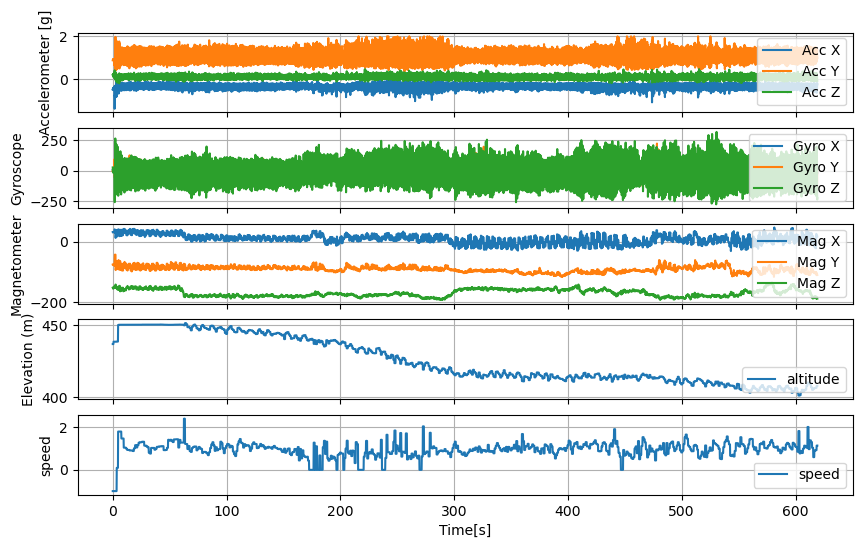

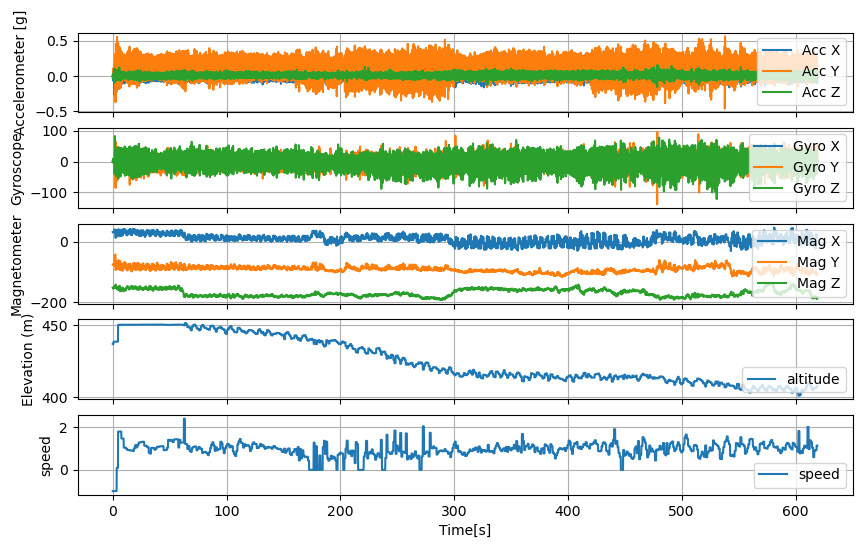

----train_trace_019{'board_loc': 0, 'path_idx': 1, 'activities': [1], 'gender': 'f', 'body_height': 163, 'legi': '22-956-494'}


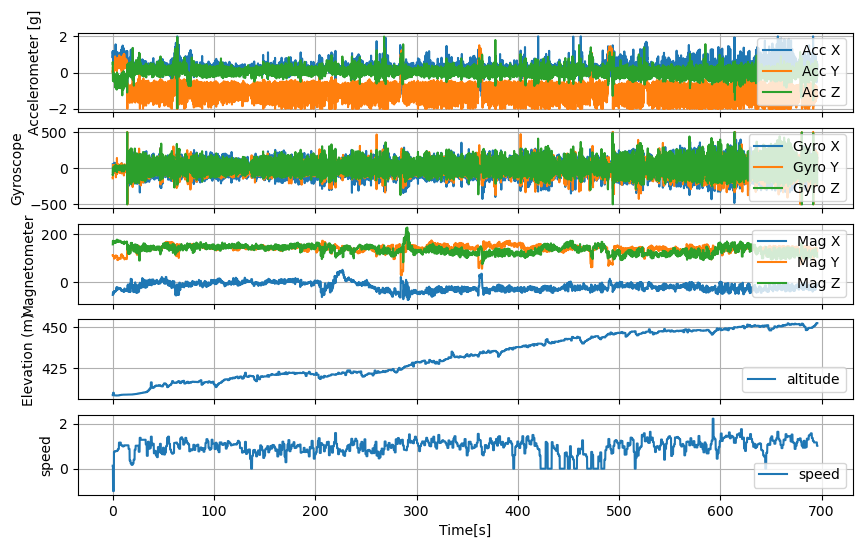

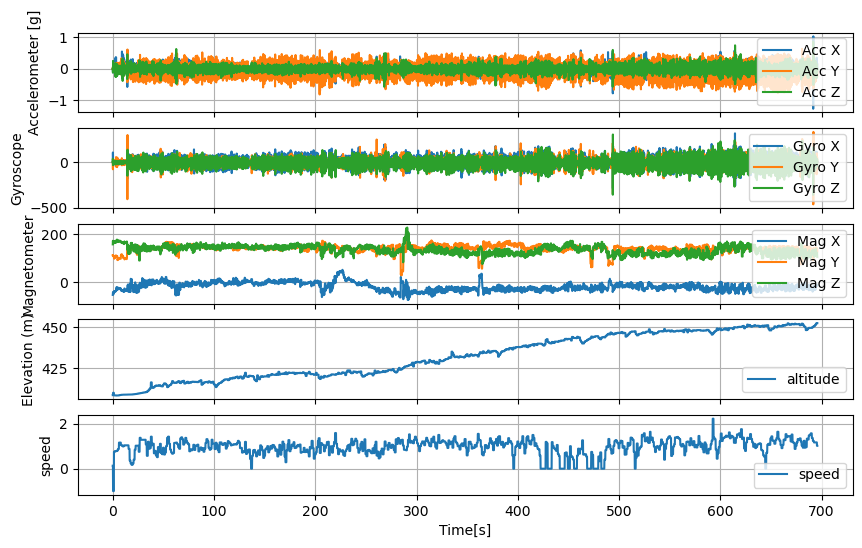

----train_trace_020{'board_loc': 0, 'path_idx': 0, 'activities': [1], 'gender': 'f', 'body_height': 163, 'legi': '22-956-494'}


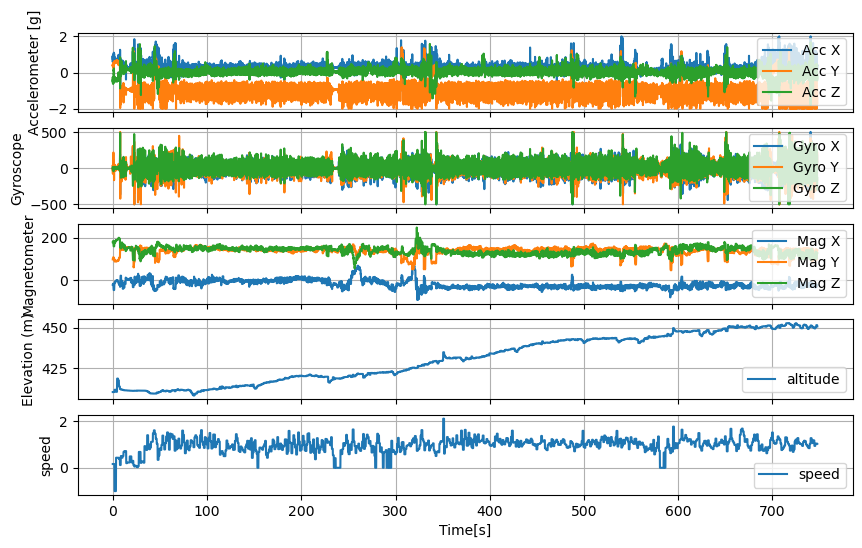

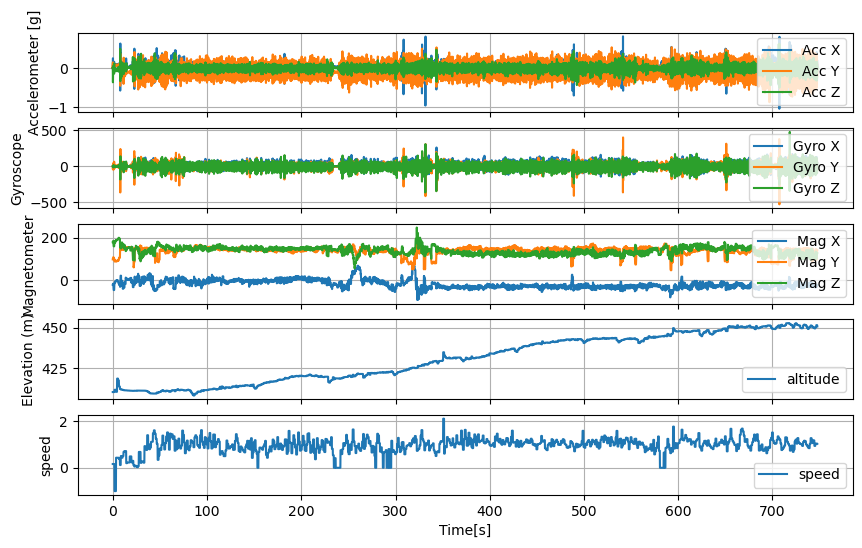

In [4]:
# plot and save all training data
path = './data/train/'
traceNames=os.listdir(path)
#traceNames=['train_trace_001.json']

for traceName in traceNames[0:20]:
   
    if traceName[-5:] == '.json':
        #print(path+'/'+ traceName,traceName[-12:-5])
        trace = Recording(path+'/'+ traceName, no_labels=False, mute=True)
        print('----'+traceName[:-5]+ str(trace.labels))

        trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
                    ylabels=['Accelerometer [g]', 'Gyroscope', 'Magnetometer', 'Elevation (m)', 'speed'],
                    labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['altitude'], ['speed']])

        trace.data['ax'].values = get_lowpass(get_highpass(trace.data['ax'].values))
        trace.data['ay'].values = get_lowpass(get_highpass(trace.data['ay'].values))
        trace.data['az'].values = get_lowpass(get_highpass(trace.data['az'].values))
        trace.data['gx'].values = get_lowpass(get_highpass(trace.data['gx'].values))
        trace.data['gy'].values = get_lowpass(get_highpass(trace.data['gy'].values))
        trace.data['gz'].values = get_lowpass(get_highpass(trace.data['gz'].values))


        trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
                    ylabels=['Accelerometer [g]', 'Gyroscope', 'Magnetometer', 'Elevation (m)', 'speed'],
                    labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['altitude'], ['speed']])
        
        #plt.savefig('./kaggle/working/'+traceName[:-5]+'.png') 
    



